<a href="https://colab.research.google.com/github/abhi-678/abhi-678/blob/main/FOOD_ORDER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Librarires,Model And Pipeline**

In [ ]:
#libraries
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

#pipeline
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold

**Reading the dataset**

In [ ]:
data = pd.read_csv('onlinedeliverydata.csv')
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [ ]:
data=data[["Age","Gender","Marital Status","Occupation","Monthly Income","Educational Qualifications","Family size","latitude","longitude","Pin code","Output"]].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         0 non-null      int64  
 1   Gender                      0 non-null      object 
 2   Marital Status              0 non-null      object 
 3   Occupation                  0 non-null      object 
 4   Monthly Income              0 non-null      object 
 5   Educational Qualifications  0 non-null      object 
 6   Family size                 0 non-null      int64  
 7   latitude                    0 non-null      float64
 8   longitude                   0 non-null      float64
 9   Pin code                    0 non-null      int64  
 10  Output                      0 non-null      object 
dtypes: float64(2), int64(3), object(6)
memory usage: 0.0+ bytes


In [ ]:
data.isnull().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

**Data Analysis With Visualization**

<Axes: title={'center': 'Online Food Order Decisions Based on Age of the Customer'}, xlabel='Age', ylabel='count'>

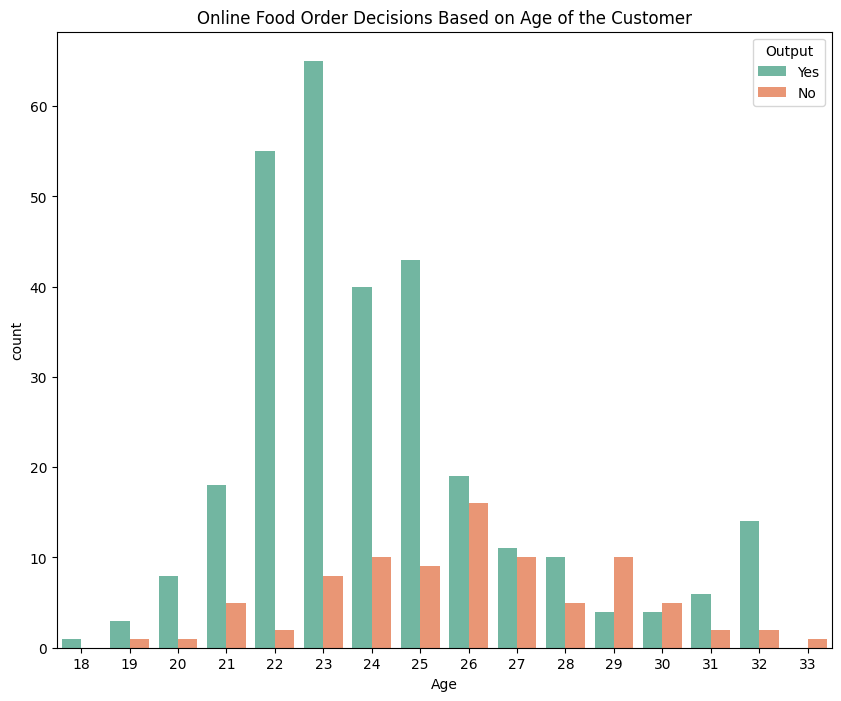

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on Age of the Customer")
sns.countplot(x='Age',data=data,hue='Output',palette="Set2")

While the output is 'Yes' in the 22-25 age range, the output is mostly 'No' for 29-year-old users. This indicates that online food delivery companies specifically target these age groups(22-25 age range).

<Axes: title={'center': 'Online Food Order Decisions Based on Size of the Family'}, xlabel='Family size', ylabel='count'>

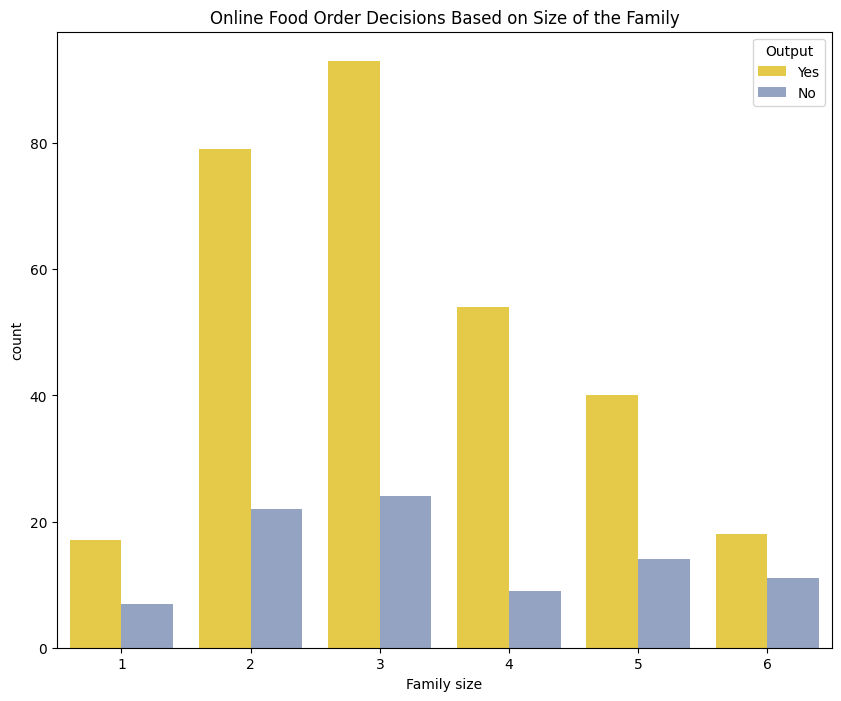

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on Size of the Family")
sns.countplot(x='Family size',data=data,hue='Output',palette="Set2_r")

Families of 2-3 people order more food.These families can also be group of friends.



<Axes: title={'center': 'Online Food Order Decisions Based on Educational Qualifications of the Customer'}, xlabel='Educational Qualifications', ylabel='count'>

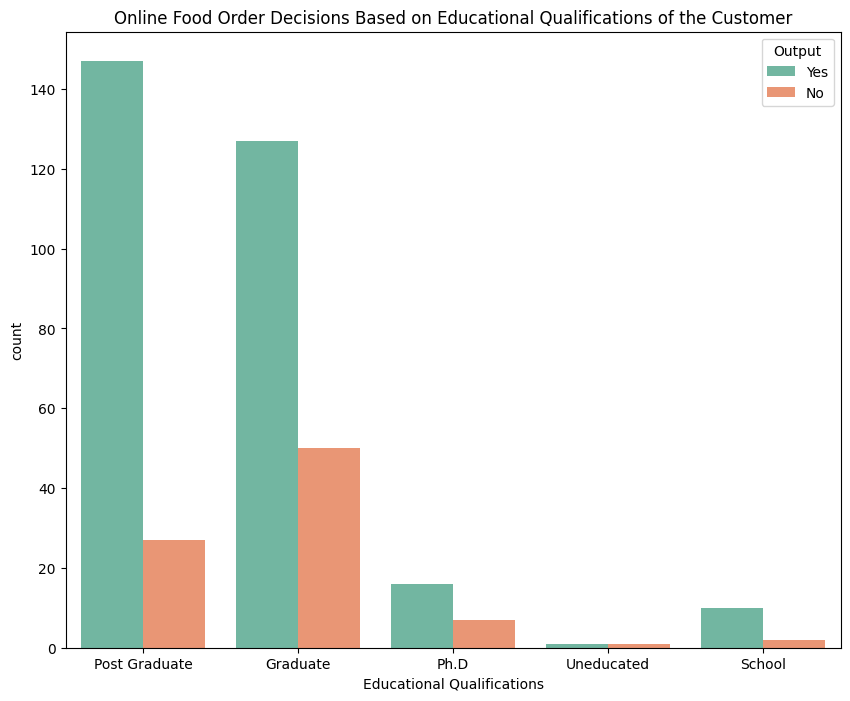

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on Educational Qualifications of the Customer")
sns.countplot(x='Educational Qualifications',data=data,hue='Output',palette="Set2")

<Axes: title={'center': 'Online Food Order Decisions Based on Educational Qualifications by the Occupation of the Customer'}, xlabel='Educational Qualifications', ylabel='count'>

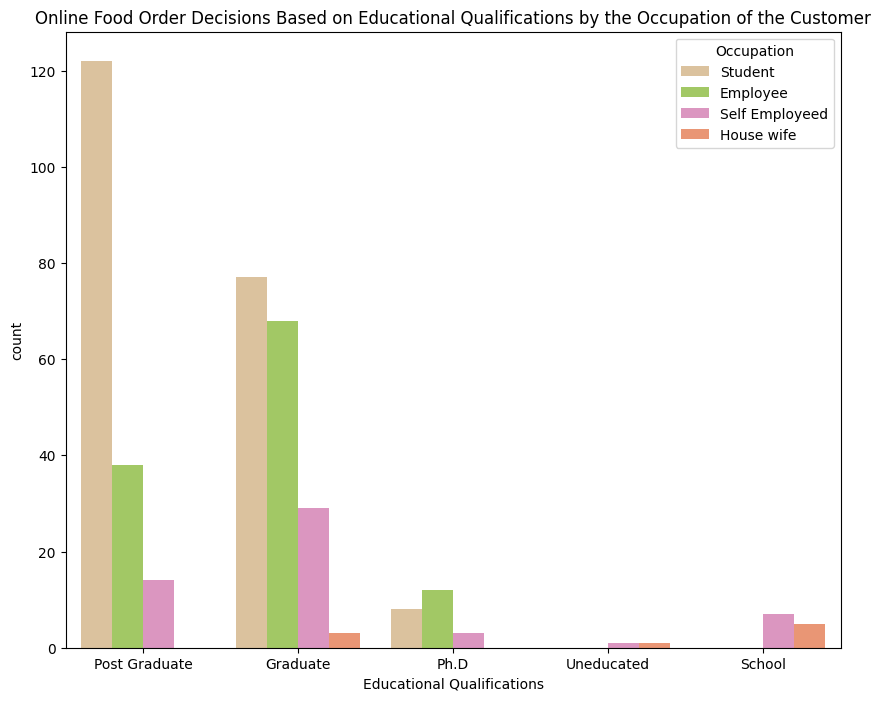

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on Educational Qualifications by the Occupation of the Customer")
sns.countplot(x='Educational Qualifications',data=data,hue='Occupation',palette="Set2_r")

The vast majority of students who place orders are pursuing a master's degree. The majority of graduates are either students or employees.In this case, the first priority of companies should be students.

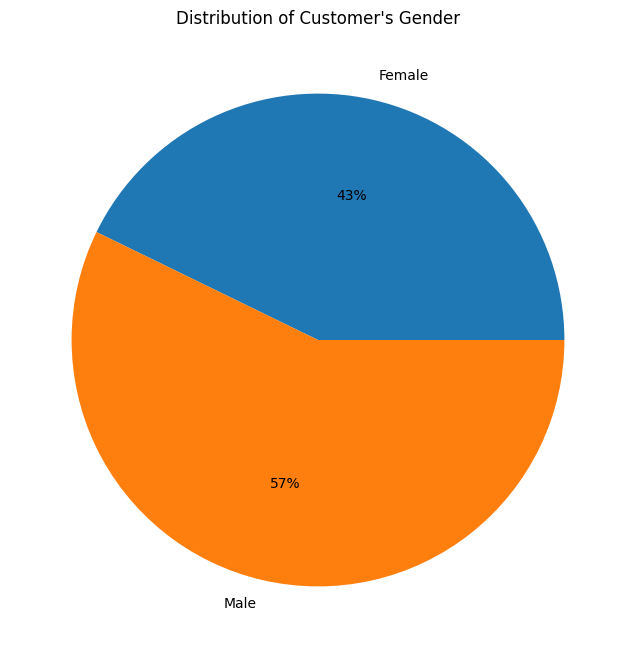

In [ ]:
female=len(data[data['Gender']=='Female'])
male=len(data[data['Gender']=='Male'])
data_gender=[female,male]
labels=['Female','Male']


colors=sns.color_palette('pastel')[0:5]

plt.figure(figsize=(10,8))
plt.title("Distribution of Customer's Gender")
plt.pie(data_gender,labels=labels,autopct='%.0f%%')
plt.show()

The number of male customer is higher than that of female customer. Now we are going to look at the distribution of occupation and gender and reorder it by gender.



<Axes: title={'center': 'Educational Qualifications Based on the Gender of the Customer'}, xlabel='Occupation', ylabel='count'>

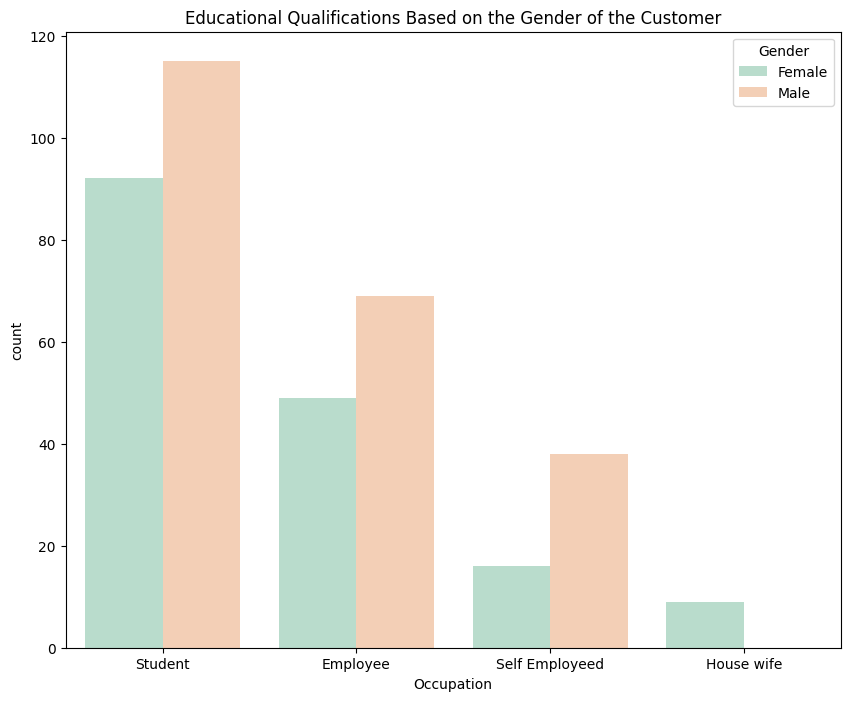

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Occupation',data=data,hue='Gender',palette="Pastel2")

The number of male students are higher than the number of female students according to the above graph.

**Which gender is most like to order again?**

In [ ]:
reorder=data[data['Output']=="Yes"]
gender_data=reorder['Gender'].value_counts()
label=gender_data.index
counts=gender_data.values

colors = sns.color_palette('pastel')[2:4]

fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text="Which gender is most like to order online again?")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors))
fig.show()

58% of male customers tend to reorder compared to 41% of female customers.

<Axes: title={'center': 'Educational Qualifications Based on the Gender of the Customer'}, xlabel='Monthly Income', ylabel='count'>

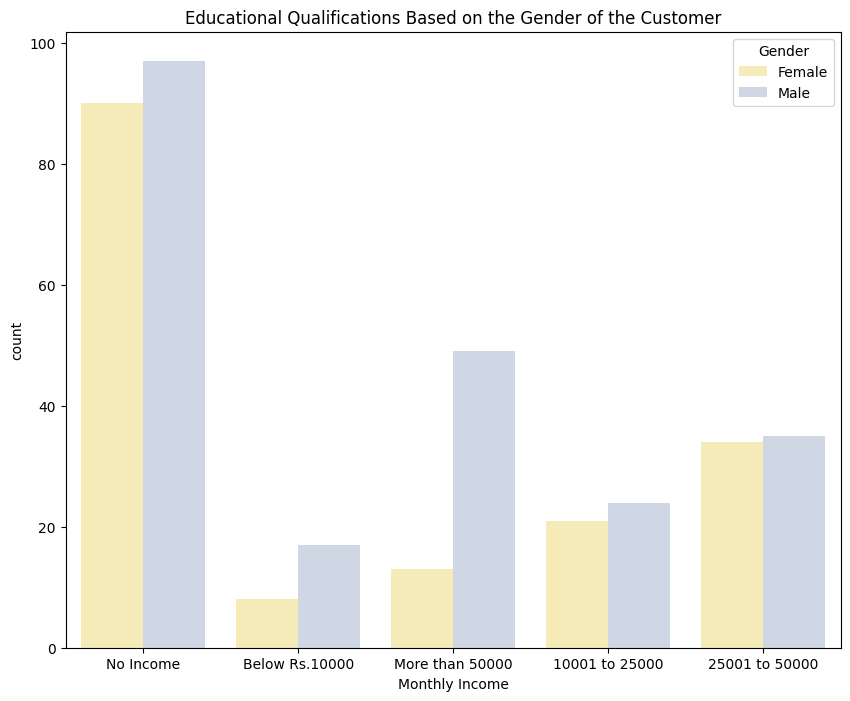

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Monthly Income',data=data,hue='Gender',palette='Pastel2_r')

We see that those with no income(54%) have a higher rate of reordering compared to not placing an order. The main reason for this can be the majority of customers are students who are having no income.

In [ ]:
reorder=data[data['Output']=="Yes"]
status_data=reorder['Marital Status'].value_counts()
label=status_data.index
counts=status_data.values

fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text="What is Marital Status of Customers?")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors))
fig.show()

About 76% of customers who order the food are married.

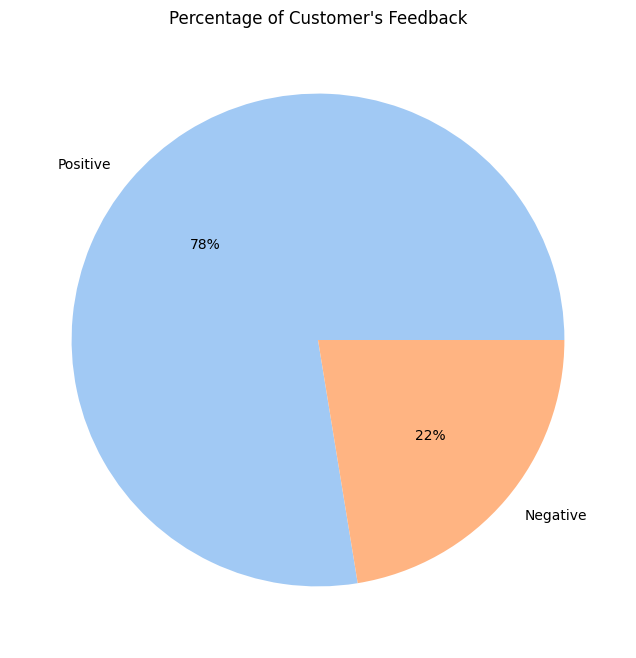

In [ ]:
positive=len(data[data['Output']=='Yes'])
negative=len(data[data['Output']=='No'])

data_feedback=[positive,negative]
labels=['Positive','Negative']

colors=sns.color_palette('pastel')[0:5]

plt.figure(figsize=(10,8))
plt.title("Percentage of Customer's Feedback")
plt.pie(data_feedback,labels=labels,colors=colors,autopct='%.0f%%')
plt.show()

Of the total comments, 78% are positive while 22% are negative.

**Preparing the Data**

In [ ]:
data["Monthly Income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [ ]:
data["Gender"]=data["Gender"].map({"Male":1,"Female":0})
data["Marital Status"]=data["Marital Status"].map({"Married":1,"Single":0,"Prefer not to say":2})

data["Occupation"]=data["Occupation"].replace(to_replace=["Employee","Self Employed"],value=1)
data["Occupation"]=data["Occupation"].replace(to_replace=["Student","House Wife"],value=0)

data["Educational Qualifications"]=data["Educational Qualifications"].map({"Graduate":1,"Post Graduate":2,"Ph.D":3,"School":4,"Uneducated":5})

data["Monthly Income"]=data["Monthly Income"].replace(to_replace=["No Income"],value=0)#no income
data["Monthly Income"]=data["Monthly Income"].replace(to_replace=["Below Rs.10000","More than 50000","25001 to 50000","10001 to 25000"],value=1)#has an income

data["Output"]=data["Output"].map({"Yes":1,"No":0})

**Prediction Model**

In [ ]:
print(data.columns)
X = data.drop('Output',axis=1)
y = data['Output']

X = pd.get_dummies(X)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=101)

print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output'],
      dtype='object')
Shape of train dataset :  (310, 13)
Shape of test dataset :  (78, 13)


In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

print(rfc.score(X_test, y_test))

0.8717948717948718


[[ 8  0]
 [10 60]]


<Axes: >

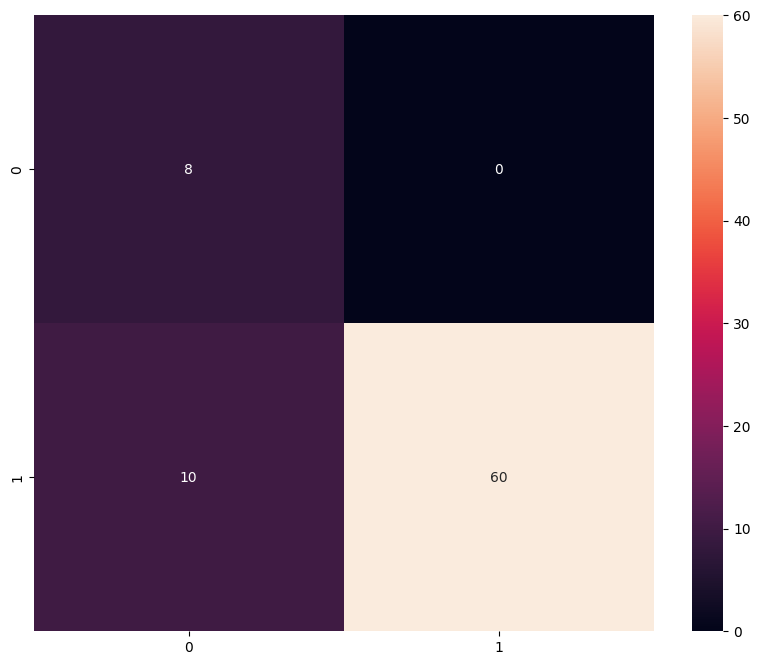

In [ ]:
pred = rfc.predict(X_test)

print(confusion_matrix(pred,y_test))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(pred,y_test), annot=True)

In [ ]:
scores = cross_val_score(rfc, X_train, y_train,cv=2)
print("Accuracy: ", scores.mean(), scores.std() * 2)

Accuracy:  0.8193548387096774 0.0


**Parameter Search**

In [ ]:
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4],
    'Employment': ['Self Employed', 'Employed', 'Self Employed', 'Employed'],
    'Target': [0, 1, 0, 1]
})


X = pd.get_dummies(data.drop('Target', axis=1))
y = data['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


print("Number of samples in X_train:", X_train.shape[0])

print("Class distribution in y_train:")
print(y_train.value_counts())

n_splits = min(2, y_train.value_counts().min())


rfc = RandomForestClassifier()


param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20]
}


cv = StratifiedKFold(n_splits=2)


gridsearch = GridSearchCV(rfc, param_grid, cv=2)

gridsearch.fit(X_train, y_train)


print("Best parameters found: ", gridsearch.best_params_)
best_parameters = gridsearch.best_params_
for params in sorted(best_parameters.keys()):
    print("\t%s: %r" % (params, best_parameters[params]))

Number of samples in X_train: 3
Class distribution in y_train:
Target
0    2
1    1
Name: count, dtype: int64
Best parameters found:  {'max_depth': None, 'n_estimators': 50}
	max_depth: None
	n_estimators: 50


In [ ]:
print("Best score %0.3f" % gridsearch.best_score_)

Best score 0.750


**Given the following customer, would this person order?**

In [ ]:
r = random.randint(0,len(data)-1)
print(r)
new_customer = data.drop('Target', axis=1).iloc[r]
new_customer

0


Feature1                  1
Employment    Self Employed
Name: 0, dtype: object

In [ ]:
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4],
    'Employment': ['Self Employed', 'Employed', 'Self Employed', 'Employed'],
    'Target': [0, 1, 0, 1]
})


X = pd.get_dummies(data.drop('Target', axis=1))
y = data['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier()


rfc.fit(X_train, y_train)


new_customer = pd.DataFrame({
    'Feature1': [5],
    'Employment': ['Self Employed'],
})


new_customer_encoded = pd.get_dummies(new_customer)


missing_cols = set(X_train.columns) - set(new_customer_encoded.columns)
for col in missing_cols:
    new_customer_encoded[col] = 0

new_customer_encoded = new_customer_encoded[X_train.columns]


prediction = rfc.predict(new_customer_encoded)
print("Prediction:", prediction)

Prediction: [0]


In [ ]:
data.iloc[r]['Target']

0